<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_latest_viral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

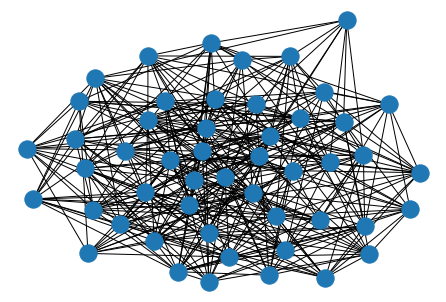

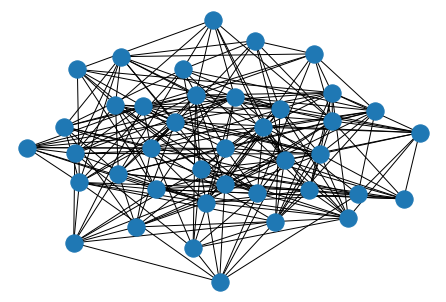

In [1]:
#Erdos-Renyi Graph in Networkx
import numpy as np
from statistics import mean
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 1 ... 1 1 0]]
[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 0]
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load']*.5)})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  neighbors.append(Agent_next[a_id][3]['First_node'])
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:  
                      I1=(Node[Agent_next[a_id][4]['First_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][4]['First_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][4]['First_nodeN'][2]][2]['I'])
                      I2=(Node[Agent_next[a_id][6]['Second_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][6]['Second_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][6]['Second_nodeN'][2]][2]['I'])
                      IH=(Node[Agent_next[a_id][2]['Home_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][2]['Home_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][2]['Home_nodeN'][2]][2]['I'])
                      V1 = (Node[Agent_next[a_id][4]['First_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][4]['First_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][4]['First_nodeN'][2]][0]['Viral_load'])
                      V2 = (Node[Agent_next[a_id][6]['Second_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][6]['Second_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][6]['Second_nodeN'][2]][0]['Viral_load'])
                      VH = (Node[Agent_next[a_id][2]['Home_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][2]['Home_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][2]['Home_nodeN'][2]][0]['Viral_load'])
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      PH = IH/(IH**2 + .01) + VH/(VH**2+.01)
                      if max(P1,P2,PH) == PH:
                        PH = 3*PH
                        P1 = P1/3
                        P2 = P2/3
                      elif max(P1,P2,PH) == P1:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      else:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      P = P1 + P2 + PH                      
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1 = PH/P 
                        PNN2 = P1/P
                        PNN3 = P2/P 
                      #next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      next = random.choices(neighbors,weights=(.96,.02,.02), k=1)[0]
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      I2 = Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']
                      I3 = Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']
                      I1 = Node[Agent_next[a_id][8]['Current_nodeN'][0]][2]['I']
                      V2 = Node[Agent_next[a_id][8]['Current_nodeN'][1]][0]['Viral_load']
                      V3 = Node[Agent_next[a_id][8]['Current_nodeN'][2]][0]['Viral_load']
                      V1 = Node[Agent_next[a_id][8]['Current_nodeN'][0]][0]['Viral_load']
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      P3 = I3/(I3**2 + .01) + V3/(V3**2+.01)
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      if max(P1,P2,P3) == P1:
                        P1 = P1
                        P2 = P2/3
                        P3 = P3/3
                      elif max(P1,P2,P3) == P2:
                        P1 = P1
                        P2 = P2
                        P3 = P1/2
                      else:
                        P1 = P1
                        P2 = P2/2
                        P3 = P3
                      P = P1+P2+P3
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1=P1/P
                        PNN2=P2/P
                        PNN3=P3/P
                       
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            if nex != cur:
              Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] <= .0625:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  total_V=0.0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
    total_V+=Node[i][0]['Viral_load']
  return count_S,count_I,count_R,total_V

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9813, 9589, 9285, 8948, 8611, 8210, 7716, 7121, 6469, 5749, 4976, 4261, 3595, 2949, 2414, 1953, 1602, 1338, 1138, 1015, 916, 844, 794, 761, 734, 720, 700, 688, 680, 674, 673, 669, 666, 665, 663, 661, 659, 658, 657, 654, 654, 653, 653, 652, 652, 652, 652, 652, 652, 652, 651, 650, 649, 649, 648, 646, 645, 645, 644, 644, 644, 644, 644, 644, 643, 641, 639, 639, 639, 638, 637, 637, 637, 637, 637, 637, 637, 637, 637, 637, 637]
[187, 411, 715, 1052, 1202, 1379, 1569, 1827, 2142, 2461, 2740, 2860, 2874, 2800, 2562, 2308, 1993, 1611, 1276, 938, 686, 494, 344, 254, 182, 124, 94, 73, 54, 46, 27, 19, 14, 9, 10, 8, 7, 7, 6, 7, 5, 5, 4, 2, 2, 1, 1, 0, 0, 0, 1, 2, 3, 3, 3, 4, 4, 4, 4, 2, 1, 1, 0, 0, 1, 3, 5, 5, 4, 3, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 187, 411, 715, 1052, 1389, 1790, 2284, 2879, 3531, 4251, 5024, 5739, 6405, 7051, 7586, 8047, 8398, 8662, 8862, 8985, 9084, 9156, 9206, 9239, 9266, 9280, 9300, 9312, 9320, 9326, 9327, 9331, 9334, 9335, 9337, 9339, 9341, 9342, 9343, 9346, 9346

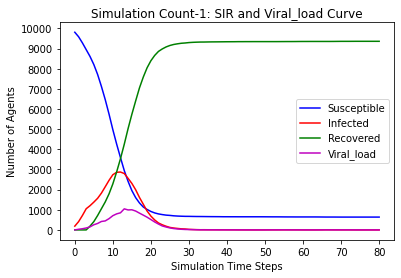

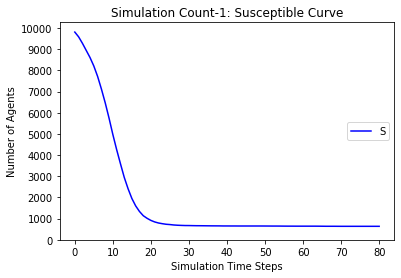

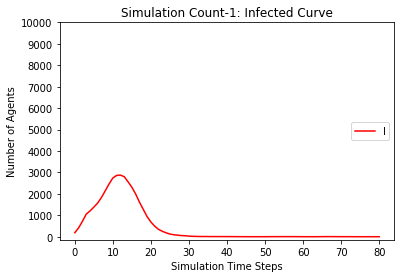

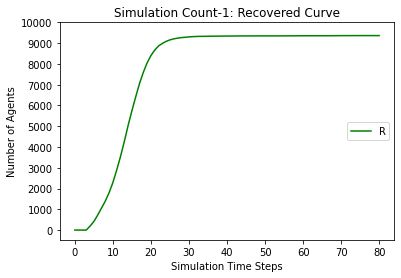

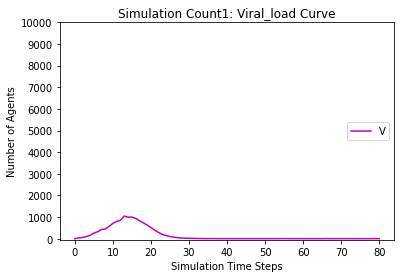

[9813, 9590, 9299, 8948, 8518, 8055, 7531, 6988, 6382, 5670, 4881, 4161, 3520, 2938, 2486, 2060, 1729, 1460, 1268, 1120, 1010, 921, 873, 830, 799, 784, 764, 756, 751, 746, 742, 739, 739, 739, 739, 739, 738, 738, 738, 738, 738, 738, 738, 738, 737, 737, 737, 736, 736, 736, 736, 735, 735, 735, 735, 735, 735, 735, 735, 733, 730, 728, 727, 727, 727, 727, 727, 727, 727, 727, 726, 724, 723, 722, 721, 720, 718, 718, 717, 716, 715, 715, 713, 713, 712, 712, 712, 712, 712, 711, 710, 707, 707, 705, 704, 704, 700, 699, 698, 697, 697, 697, 697, 696, 696, 696, 696, 696, 696, 696, 696, 693, 692, 690, 690, 688, 687, 685, 683, 682, 680, 679, 678, 678, 678, 677, 675, 674, 674, 673, 673, 672, 672, 671, 671, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670]
[187, 410, 701, 1052, 1295, 1535, 1768, 1960, 2136, 2385, 2650, 2827, 2862, 2732, 2395, 2101, 1791, 1478, 1218, 940, 719, 539, 395, 290, 211, 137, 109, 74, 48, 38, 22, 17, 12, 7, 3, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,

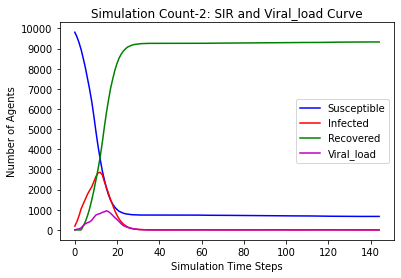

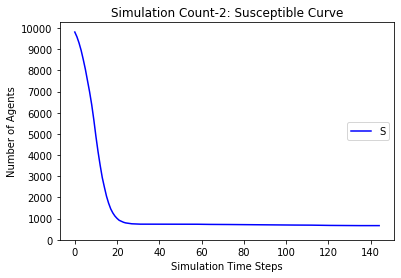

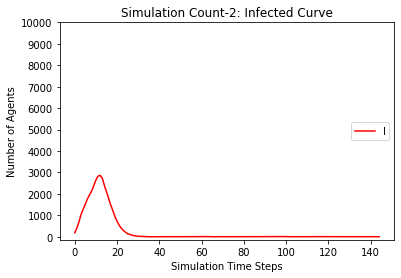

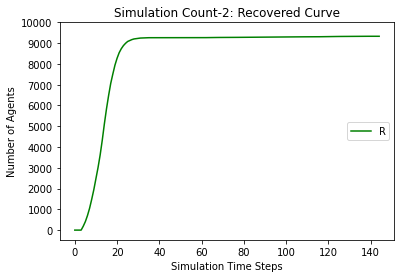

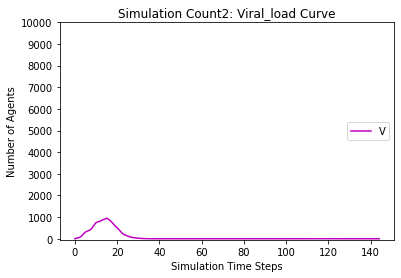

[9813, 9613, 9314, 8992, 8655, 8229, 7702, 7116, 6461, 5782, 4940, 4166, 3336, 2650, 2053, 1579, 1248, 1026, 889, 802, 745, 691, 657, 634, 614, 598, 589, 585, 580, 579, 578, 577, 576, 576, 575, 575, 574, 573, 570, 568, 565, 565, 564, 564, 564, 564, 564, 564, 564, 564]
[187, 387, 686, 1008, 1158, 1384, 1612, 1876, 2194, 2447, 2762, 2950, 3125, 3132, 2887, 2587, 2088, 1624, 1164, 777, 503, 335, 232, 168, 131, 93, 68, 49, 34, 19, 11, 8, 4, 3, 3, 2, 2, 3, 5, 7, 9, 8, 6, 4, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 187, 387, 686, 1008, 1345, 1771, 2298, 2884, 3539, 4218, 5060, 5834, 6664, 7350, 7947, 8421, 8752, 8974, 9111, 9198, 9255, 9309, 9343, 9366, 9386, 9402, 9411, 9415, 9420, 9421, 9422, 9423, 9424, 9424, 9425, 9425, 9426, 9427, 9430, 9432, 9435, 9435, 9436, 9436, 9436, 9436]
[0.0, 36.0, 53.0, 83.5, 122.75, 252.375, 332.1875, 385.09375, 489.546875, 534.7734375, 917.38671875, 957.693359375, 1061.8466796875, 1035.92333984375, 1161.961669921875, 1249.9808349609375, 1122.9904174804688, 930.49520874

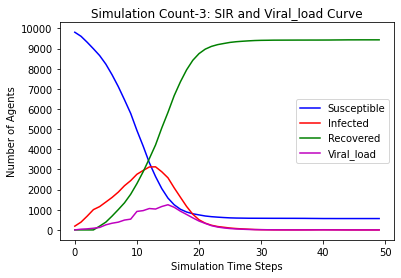

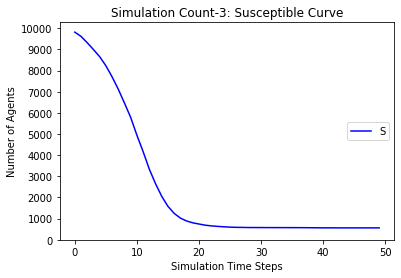

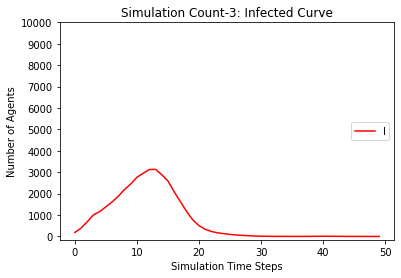

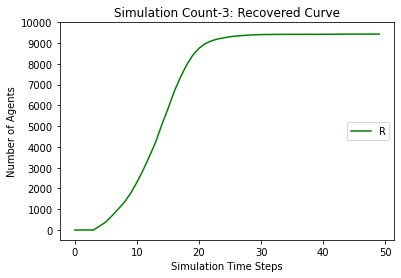

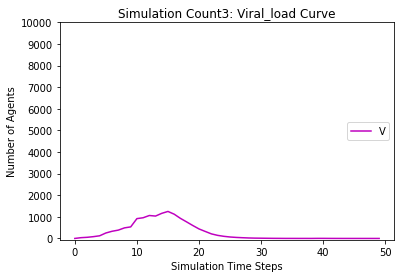

[9813, 9586, 9285, 8890, 8476, 8061, 7530, 6860, 6181, 5472, 4700, 3904, 3188, 2539, 2011, 1624, 1350, 1166, 1001, 897, 832, 792, 762, 739, 721, 705, 698, 685, 681, 677, 675, 673, 668, 668, 668, 668, 668, 668, 668, 668, 667, 667, 666, 665, 665, 665, 664, 664, 664, 664, 664, 664, 664, 664, 664]
[187, 414, 715, 1110, 1337, 1525, 1755, 2030, 2295, 2589, 2830, 2956, 2993, 2933, 2689, 2280, 1838, 1373, 1010, 727, 518, 374, 239, 158, 111, 87, 64, 54, 40, 28, 23, 12, 13, 9, 7, 5, 0, 0, 0, 0, 1, 1, 2, 3, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 187, 414, 715, 1110, 1524, 1939, 2470, 3140, 3819, 4528, 5300, 6096, 6812, 7461, 7989, 8376, 8650, 8834, 8999, 9103, 9168, 9208, 9238, 9261, 9279, 9295, 9302, 9315, 9319, 9323, 9325, 9327, 9332, 9332, 9332, 9332, 9332, 9332, 9332, 9332, 9333, 9333, 9334, 9335, 9335, 9335, 9336, 9336, 9336, 9336, 9336]
[0.0, 35.0, 58.5, 107.25, 183.625, 247.8125, 439.90625, 480.953125, 528.4765625, 577.23828125, 717.619140625, 830.8095703125, 910.40478515625, 1092.2

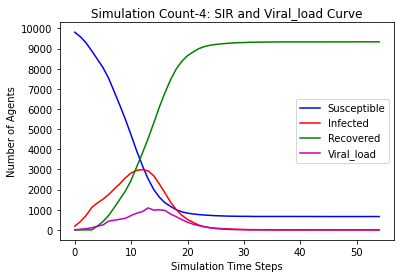

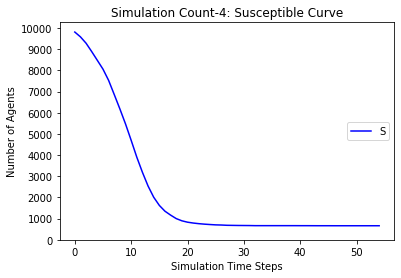

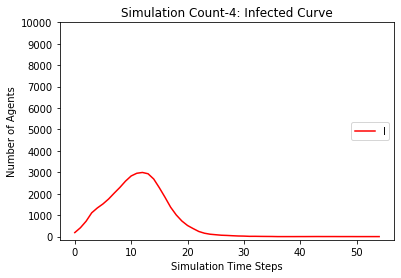

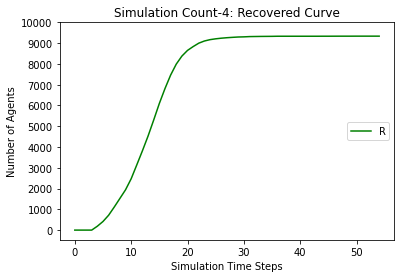

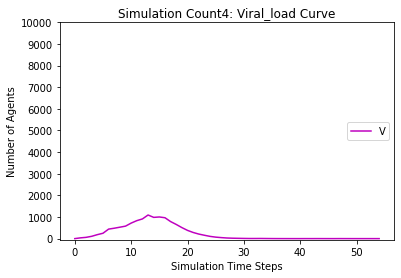

[9813, 9576, 9278, 8906, 8516, 8028, 7463, 6834, 6188, 5381, 4561, 3783, 3042, 2478, 1943, 1558, 1288, 1081, 923, 844, 782, 742, 713, 693, 684, 677, 669, 665, 663, 659, 657, 655, 654, 650, 648, 644, 643, 643, 641, 640, 639, 638, 638, 638, 636, 635, 634, 634, 633, 631, 631, 631, 631, 631, 631, 631, 631, 630, 629, 627, 625, 622, 618, 618, 617, 617, 616, 616, 615, 614, 613, 612, 612, 612, 612, 612, 611, 611, 611, 610, 610, 610, 610, 610, 610, 610, 610, 610]
[187, 424, 722, 1094, 1297, 1548, 1815, 2072, 2328, 2647, 2902, 3051, 3146, 2903, 2618, 2225, 1754, 1397, 1020, 714, 506, 339, 210, 151, 98, 65, 44, 28, 21, 18, 12, 10, 9, 9, 9, 11, 11, 7, 7, 4, 4, 5, 3, 2, 3, 3, 4, 4, 3, 4, 3, 3, 2, 0, 0, 0, 0, 1, 2, 4, 6, 8, 11, 9, 8, 5, 2, 2, 2, 3, 3, 4, 3, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 187, 424, 722, 1094, 1484, 1972, 2537, 3166, 3812, 4619, 5439, 6217, 6958, 7522, 8057, 8442, 8712, 8919, 9077, 9156, 9218, 9258, 9287, 9307, 9316, 9323, 9331, 9335, 9337, 9341, 9343, 9345,

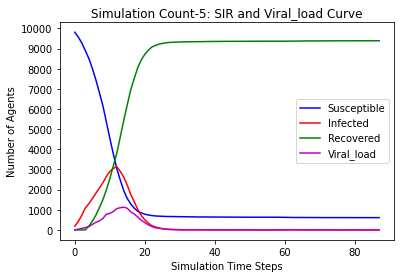

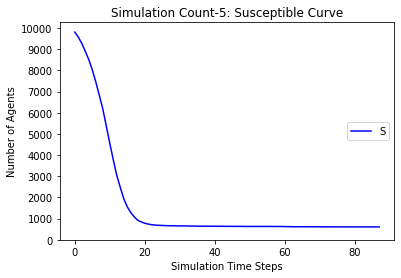

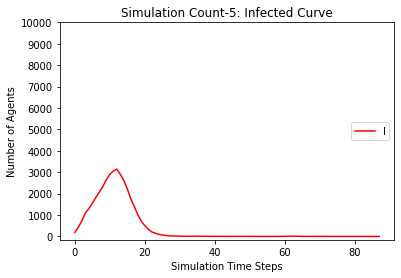

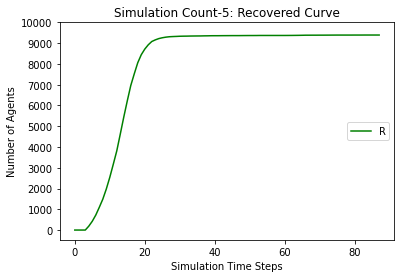

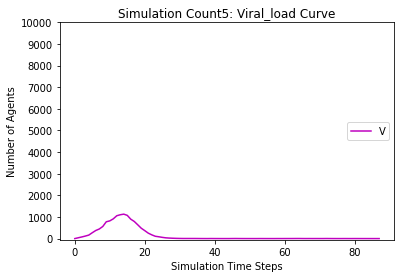

[9813, 9603, 9299, 8925, 8480, 8004, 7456, 6867, 6278, 5569, 4848, 4102, 3402, 2794, 2254, 1809, 1506, 1302, 1153, 1065, 977, 917, 872, 837, 813, 796, 777, 759, 750, 744, 739, 737, 735, 734, 732, 731, 730, 728, 727, 726, 726, 724, 724, 724, 723, 721, 720, 719, 715, 715, 715, 714, 712, 711, 709, 707, 706, 705, 705, 704, 704, 704, 704, 704, 704, 704, 704, 703, 702, 701, 700, 700, 700, 699, 699, 699, 698, 698, 697, 696, 696, 696, 695, 694, 694, 694, 694, 694, 692, 691, 689, 688, 688, 688, 688, 688, 688, 688, 688, 688, 688]
[187, 397, 701, 1075, 1333, 1599, 1843, 2058, 2202, 2435, 2608, 2765, 2876, 2775, 2594, 2293, 1896, 1492, 1101, 744, 529, 385, 281, 228, 164, 121, 95, 78, 63, 52, 38, 22, 15, 10, 7, 6, 5, 6, 5, 5, 4, 4, 3, 2, 3, 3, 4, 5, 8, 6, 5, 5, 3, 4, 6, 7, 6, 6, 4, 3, 2, 1, 1, 0, 0, 0, 0, 1, 2, 3, 4, 3, 2, 2, 1, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 0, 2, 3, 5, 6, 4, 3, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 187, 397, 701, 1075, 1520, 1996, 2544, 3133, 3722, 4431, 5152, 5898, 6598, 7206, 

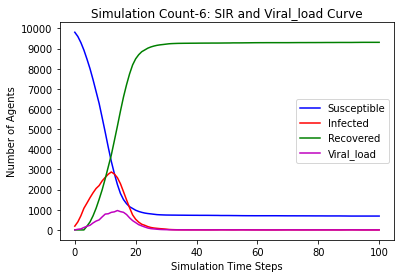

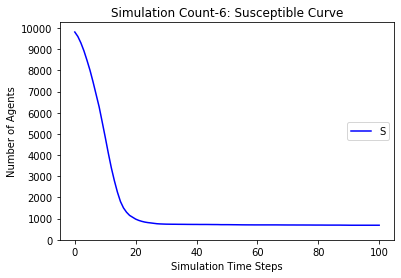

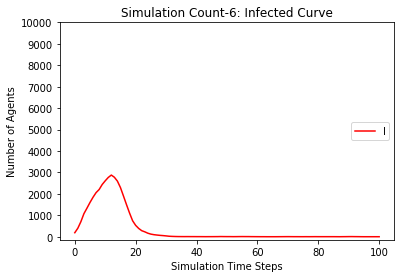

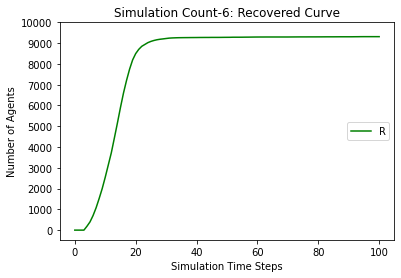

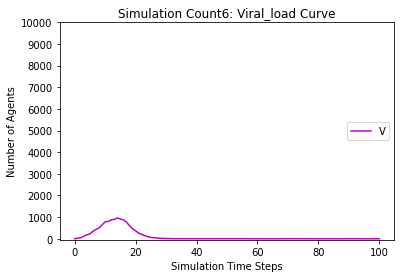

[9813, 9609, 9285, 8896, 8491, 8116, 7662, 7059, 6366, 5526, 4709, 3925, 3271, 2678, 2228, 1877, 1601, 1374, 1207, 1085, 996, 927, 892, 865, 845, 827, 820, 816, 816, 814, 813, 811, 806, 801, 798, 797, 794, 792, 791, 790, 790, 790, 790, 790, 790, 790, 790, 789, 787, 786, 786, 786, 783, 782, 780, 779, 777, 775, 772, 772, 771, 770, 770, 770, 770, 770, 770, 769, 768, 768, 767, 765, 763, 761, 759, 757, 756, 755, 755, 755, 755, 755, 753, 752, 752, 752, 752, 752, 751, 751, 751, 749, 749, 749, 749, 749, 749, 749, 749, 749, 749]
[187, 391, 715, 1104, 1322, 1493, 1623, 1837, 2125, 2590, 2953, 3134, 3095, 2848, 2481, 2048, 1670, 1304, 1021, 792, 605, 447, 315, 220, 151, 100, 72, 49, 29, 13, 7, 5, 10, 13, 15, 14, 12, 9, 7, 7, 4, 2, 1, 0, 0, 0, 0, 1, 3, 4, 4, 3, 4, 4, 6, 7, 6, 7, 8, 7, 6, 5, 2, 2, 1, 0, 0, 1, 2, 2, 3, 4, 5, 7, 8, 8, 7, 6, 4, 2, 1, 0, 2, 3, 3, 3, 1, 0, 1, 1, 1, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 187, 391, 715, 1104, 1509, 1884, 2338, 2941, 3634, 4474, 5291, 6075, 6729, 7322,

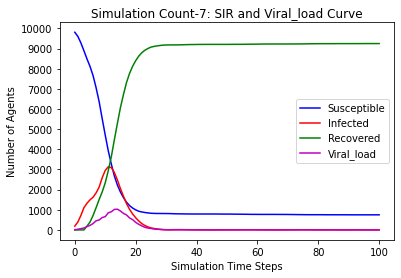

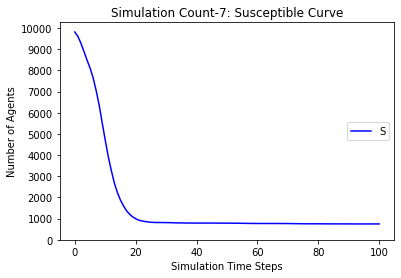

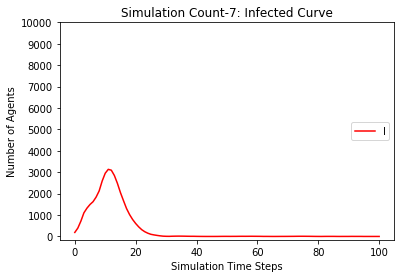

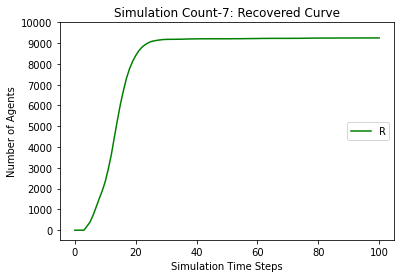

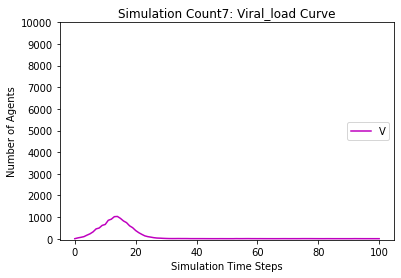

[9813, 9611, 9300, 8928, 8502, 8004, 7428, 6722, 5934, 5062, 4130, 3298, 2509, 1832, 1347, 1044, 860, 744, 674, 622, 587, 565, 547, 540, 536, 534, 532, 532, 532, 531, 531, 531, 531, 531, 531, 531, 530, 529, 529, 529, 529, 529, 529, 529, 529]
[187, 389, 700, 1072, 1311, 1607, 1872, 2206, 2568, 2942, 3298, 3424, 3425, 3230, 2783, 2254, 1649, 1088, 673, 422, 273, 179, 127, 82, 51, 31, 15, 8, 4, 3, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 187, 389, 700, 1072, 1498, 1996, 2572, 3278, 4066, 4938, 5870, 6702, 7491, 8168, 8653, 8956, 9140, 9256, 9326, 9378, 9413, 9435, 9453, 9460, 9464, 9466, 9468, 9468, 9468, 9469, 9469, 9469, 9469, 9469, 9469, 9469, 9470, 9471, 9471, 9471, 9471]
[0.0, 34.0, 77.0, 117.5, 187.75, 276.875, 377.4375, 552.71875, 654.359375, 859.1796875, 1038.58984375, 1187.294921875, 1335.6474609375, 1402.82373046875, 1461.411865234375, 1252.7059326171875, 1086.3529663085938, 875.1764831542969, 653.5882415771484, 466.7941207885742, 302.3970603942871, 181.19853019

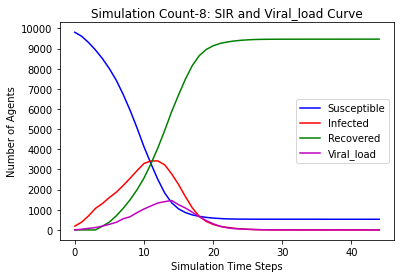

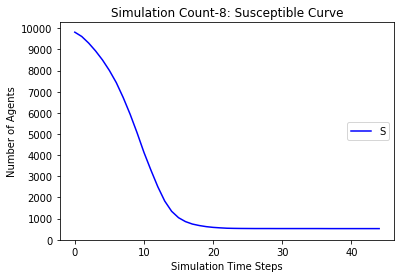

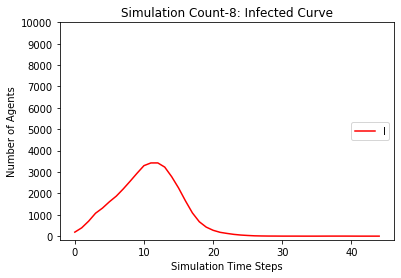

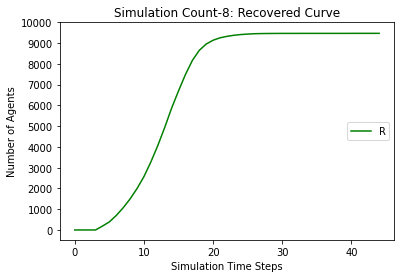

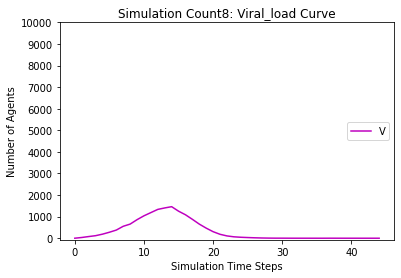

[9813, 9600, 9282, 8870, 8424, 7968, 7393, 6743, 6005, 5249, 4412, 3572, 2876, 2336, 1926, 1632, 1383, 1194, 1083, 1003, 952, 913, 886, 860, 847, 834, 825, 820, 813, 810, 806, 806, 805, 804, 804, 803, 802, 801, 801, 801, 801, 800, 800, 798, 798, 798, 797, 797, 797, 796, 796, 791, 791, 791, 791, 791, 790, 789, 788, 788, 786, 786, 786, 786, 786, 786, 786, 786, 786, 786, 786, 786, 786]
[187, 400, 718, 1130, 1389, 1632, 1889, 2127, 2419, 2719, 2981, 3171, 3129, 2913, 2486, 1940, 1493, 1142, 843, 629, 431, 281, 197, 143, 105, 79, 61, 40, 34, 24, 19, 14, 8, 6, 2, 3, 3, 3, 3, 2, 1, 1, 1, 3, 3, 2, 3, 1, 1, 2, 1, 6, 6, 5, 5, 0, 1, 2, 3, 3, 4, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 187, 400, 718, 1130, 1576, 2032, 2607, 3257, 3995, 4751, 5588, 6428, 7124, 7664, 8074, 8368, 8617, 8806, 8917, 8997, 9048, 9087, 9114, 9140, 9153, 9166, 9175, 9180, 9187, 9190, 9194, 9194, 9195, 9196, 9196, 9197, 9198, 9199, 9199, 9199, 9199, 9200, 9200, 9202, 9202, 9202, 9203, 9203, 9203, 9204, 9204, 9209, 

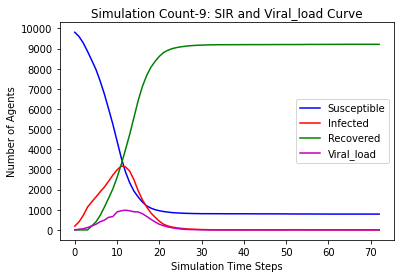

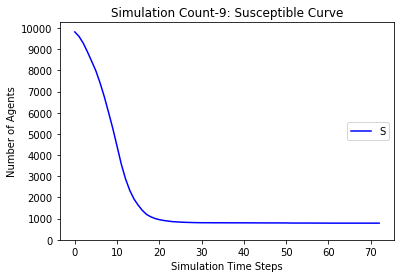

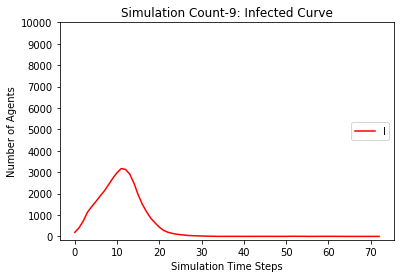

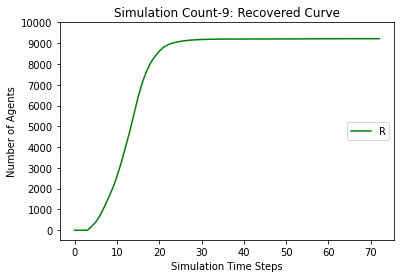

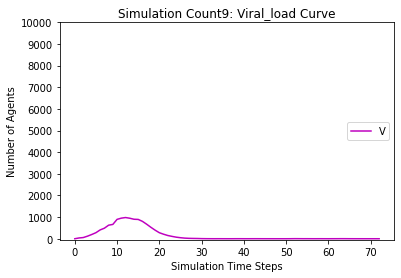

[9813, 9603, 9306, 8952, 8616, 8202, 7746, 7243, 6723, 6188, 5514, 4822, 4040, 3306, 2693, 2149, 1676, 1369, 1154, 996, 882, 823, 769, 724, 694, 679, 669, 660, 657, 652, 649, 643, 641, 638, 636, 634, 633, 632, 629, 629, 628, 628, 628, 628, 628, 627, 626, 626, 625, 624, 622, 621, 620, 619, 618, 617, 616, 616, 616, 616, 615, 615, 614, 613, 613, 613, 613, 612, 612, 611, 611, 611, 611, 611, 610, 609, 608, 608, 608, 608, 608, 608, 608, 608, 608]
[187, 397, 694, 1048, 1197, 1401, 1560, 1709, 1893, 2014, 2232, 2421, 2683, 2882, 2821, 2673, 2364, 1937, 1539, 1153, 794, 546, 385, 272, 188, 144, 100, 64, 37, 27, 20, 17, 16, 14, 13, 9, 8, 6, 7, 5, 5, 4, 1, 1, 0, 1, 2, 2, 3, 3, 4, 5, 5, 5, 4, 4, 4, 3, 2, 1, 1, 1, 2, 3, 2, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 3, 3, 2, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 187, 397, 694, 1048, 1384, 1798, 2254, 2757, 3277, 3812, 4486, 5178, 5960, 6694, 7307, 7851, 8324, 8631, 8846, 9004, 9118, 9177, 9231, 9276, 9306, 9321, 9331, 9340, 9343, 9348, 9351, 9357, 9359, 9362, 9364, 

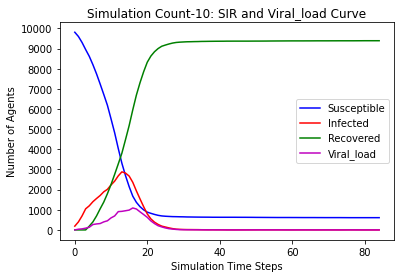

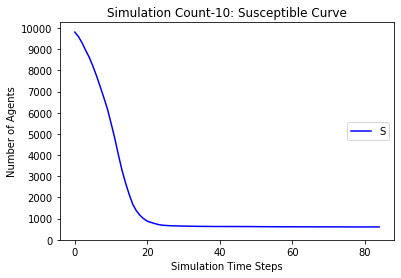

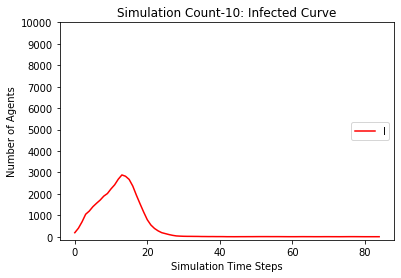

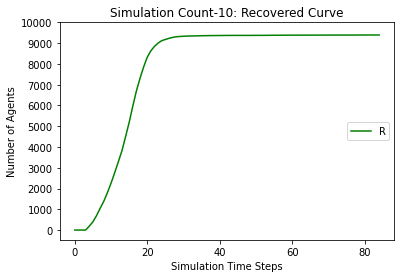

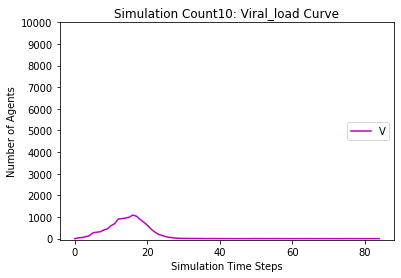

In [10]:
SS,II,RR,VV,TT = [[]],[[]],[[]],[[]],[[]]
for i in range(10):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,V,T = [],[],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  V.append(Vj)
  T.append(j)

  while Ij > 0 or Vj > 0.01 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    V.append(Vj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  print(V)
  SS.append(S)
  II.append(I)
  RR.append(R)
  VV.append(V)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  print(VV)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g',T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': SIR and Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Susceptible Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Infected Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Recovered Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

  plt.plot(T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count'+str(i+1)+': Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Viral_load"),loc='center right')
  plt.show()  

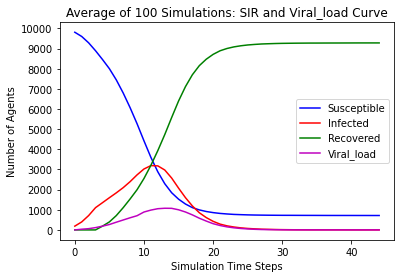

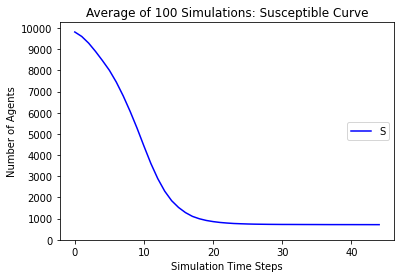

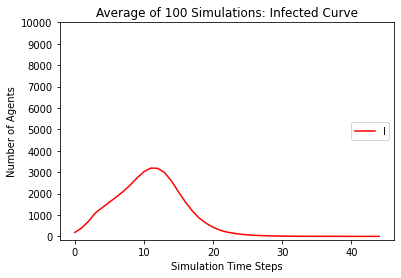

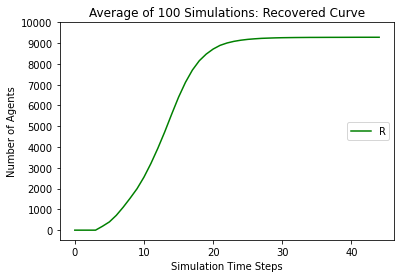

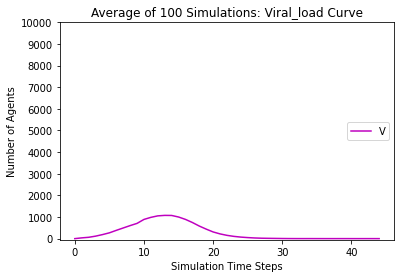

In [11]:
SC = SS[1]
IC = II[1]
RC = RR[1]
VT = VV[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  VT = [mean(i) for i in zip(VT,VV[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g', TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: SIR and Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Infected Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))

plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Recovered"),loc='center right')
plt.show()  

plt.plot(TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Viral_load"),loc='center right')
plt.show() 



  
